In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
Mixer = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190523_NorthCavFSSOsc/North_MixerCh_1.txt',delimiter=',')
Refl = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190523_NorthCavFSSOsc/North_CavRefl_1.txt',delimiter=',')

In [3]:
MixerChpkpk = (max(Mixer[:,1])-min(Mixer[:,1]))
Refldip = max(Refl[:,1])-min(Refl[:,1])

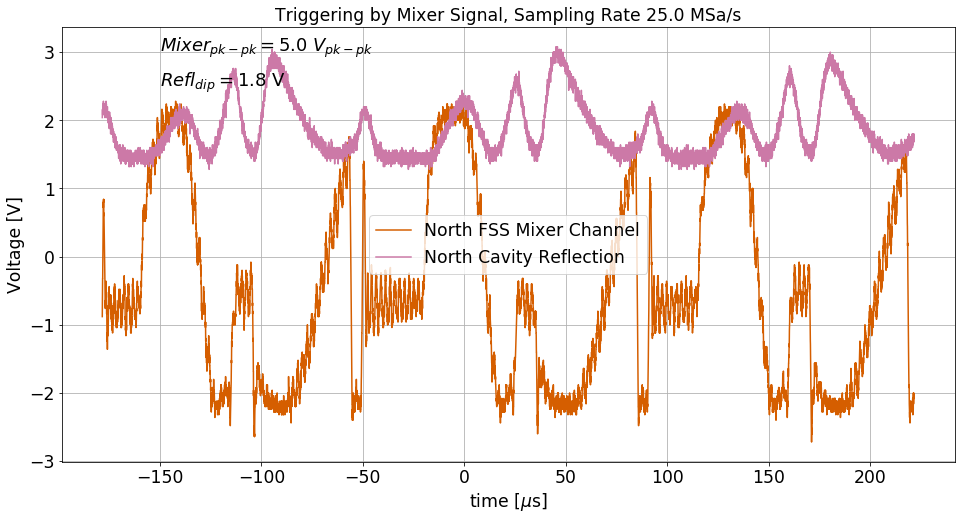

In [4]:
tt = Mixer[:,0]*1e6
SR = 1/(tt[1]-tt[0])
fig = plt.figure(figsize=[16,8])
ax = fig.gca()
ax.plot(tt,Mixer[:,1], color = cList[2],label=r'North FSS Mixer Channel')
ax.plot(tt,Refl[:,1], color = cList[3],label=r'North Cavity Reflection ')
ax.set_title('Triggering by Mixer Signal, Sampling Rate '+str(np.round(SR,2))+' MSa/s')
ax.set_xlabel('time [$\mu$s]')
ax.set_ylabel('Voltage [V]')

ax.grid('on', which='both')
ax.grid(alpha=0.2, which='minor')
ax.legend()

ax.text(-150,3,r'$Mixer_{pk-pk} = $'+str(np.round(MixerChpkpk,2))+' $ V_{pk-pk}$', fontsize=18)
ax.text(-150,2.5,r'$Refl_{dip} = $'+str(np.round(Refldip,2))+' V', fontsize=18)
figlist +=[fig]

In [5]:
pp = PdfPages('NorthCavFSSOsc.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()